# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import and Process Data

In [2]:
world_hap_2015 = pd.read_csv('data/2015.csv')
world_hap_2016 = pd.read_csv('data/2016.csv')
world_hap_2017 = pd.read_csv('data/2017.csv')
world_hap_2018 = pd.read_csv('data/2018.csv')
world_hap_2019 = pd.read_csv('data/2019.csv')
country_and_region = world_hap_2015[['Country', 'Region']]

world_hap_2015.drop(columns=['Region', 'Happiness Rank', 'Standard Error'], inplace=True)
world_hap_2016.drop(columns=['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
world_hap_2017.drop(columns=['Happiness.Rank', 'Whisker.high', 'Whisker.low'], inplace=True)
world_hap_2018.drop(columns=['Overall rank'], inplace=True)
world_hap_2019.drop(columns=['Overall rank'], inplace=True)

world_hap_2015.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia_Residual']
world_hap_2016.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia_Residual']

world_hap_2017.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom','Generosity', 'Corruption', 'Dystopia_Residual']
world_hap_2018.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']
world_hap_2019.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']

world_hap_2018['Dystopia_Residual'] = world_hap_2018['Happiness_Score'] - (world_hap_2018['GDP_per_Capita']+world_hap_2018['Social_Support']+world_hap_2018['Life_Expectancy']+world_hap_2018['Freedom']+world_hap_2018['Generosity']+world_hap_2018['Corruption'])
world_hap_2019['Dystopia_Residual'] = world_hap_2019['Happiness_Score'] - (world_hap_2019['GDP_per_Capita']+world_hap_2019['Social_Support']+world_hap_2019['Life_Expectancy']+world_hap_2019['Freedom']+world_hap_2019['Generosity']+world_hap_2019['Corruption'])

world_hap_2015['year'] = pd.to_datetime('2015', format='%Y')
world_hap_2016['year'] = pd.to_datetime('2016', format='%Y')
world_hap_2017['year'] = pd.to_datetime('2017', format='%Y')
world_hap_2018['year'] = pd.to_datetime('2018', format='%Y')
world_hap_2019['year'] = pd.to_datetime('2019', format='%Y')

world_hap = pd.concat([world_hap_2015, world_hap_2016, world_hap_2017, world_hap_2018, world_hap_2019])
world_hap = world_hap.merge(country_and_region, how='inner', on='Country')

(782, 10)
(757, 11)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
gdp_contribution = pd.read_csv('data/GDP_Contribution.csv')

In [9]:
gdp_contribution.head()

,Country,Year,GDP,Agriculture,Industry,Manufacturing,Services
0,Afghanistan,2010,15.9,26,21.0,13.0,48.9
1,Albania,2010,11.9,18,25.0,5.0,44.0
2,Algeria,2010,161.2,8,51.0,39.0,40.3
3,American Samoa,2010,0.6,NaN,NaN,NaN,NaN
4,Andorra,2010,3.4,NaN,NaN,NaN,NaN


In [10]:
world_hap = world_hap.merge(gdp_contribution, how='inner', on='Country')

In [15]:
world_hap.head()s

In [12]:
print(world_hap.shape)

(1340, 17)


# Data Exploration

## Average Happiness by Region

In [20]:
world_hap.groupby('Region').agg({'Happiness_Score': np.nanmean}).sort_values(by='Happiness_Score', ascending=False)

,Happiness_Score
Region,
Australia and New Zealand,7.294600
North America,7.174700
Western Europe,6.759311
Latin America and Caribbean,6.012876
Eastern Asia,5.630464
Central and Eastern Europe,5.428875
Middle East and Northern Africa,5.337208
Southeastern Asia,5.335227
Southern Asia,4.580657


From the above table, we find that Australia, New Zealand, North America, and Western Europe are the most happy regions.

## Largest Contributor to Happiness by Region

In [26]:
world_hap_contribution = world_hap.copy()

#Maybe replace this with an apply statement
world_hap_contribution['GDP_per_Capita'] = world_hap_contribution['GDP_per_Capita'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Freedom'] = world_hap_contribution['Freedom'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Generosity'] = world_hap_contribution['Generosity'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Life_Expectancy'] = world_hap_contribution['Life_Expectancy'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Social_Support'] = world_hap_contribution['Social_Support'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Corruption'] = world_hap_contribution['Corruption'] / world_hap_contribution['Happiness_Score']

world_hap_contribution.groupby('Region').agg({'Happiness_Score': np.nanmean, 'GDP_per_Capita': np.nanmean, 'Freedom': np.nanmean, 'Generosity': np.nanmean, 'Life_Expectancy': np.nanmean, 'Social_Support': np.nanmean, 'Corruption': np.nanmean}).sort_values(by='Happiness_Score', ascending=False)

,Happiness_Score,GDP_per_Capita,Freedom,Generosity,Life_Expectancy,Social_Support,Corruption
Region,,,,,,,
Australia and New Zealand,7.294600,0.185924,0.083815,0.058170,0.123828,0.195298,0.048964
North America,7.174700,0.198453,0.077772,0.051791,0.120000,0.189521,0.030853
Western Europe,6.759311,0.204615,0.075463,0.039406,0.133780,0.198720,0.031564
Latin America and Caribbean,6.012876,0.154451,0.075701,0.032350,0.113382,0.198812,0.015762
Eastern Asia,5.630464,0.215900,0.075111,0.034523,0.152795,0.212897,0.020115
Central and Eastern Europe,5.428875,0.187957,0.064473,0.029268,0.129395,0.215300,0.014227
Middle East and Northern Africa,5.337208,0.204052,0.063508,0.035159,0.126660,0.186156,0.026642
Southeastern Asia,5.335227,0.162897,0.104848,0.074858,0.118224,0.205759,0.025162
Southern Asia,4.580657,0.139403,0.085216,0.065971,0.111988,0.173930,0.021575


In [27]:
world_hap_contribution.drop(['Happiness_Score', 'Dystopia_Residual'], inplace=True, axis=1)
happiness_contribution_table = pd.pivot_table(data=world_hap_contribution, index=['Region'])
happiness_contribution_table

,Corruption,Freedom,GDP_per_Capita,Generosity,Life_Expectancy,Social_Support
Region,,,,,,
Australia and New Zealand,0.048964,0.083815,0.185924,0.058170,0.123828,0.195298
Central and Eastern Europe,0.014227,0.064473,0.187957,0.029268,0.129395,0.215300
Eastern Asia,0.020115,0.075111,0.215900,0.034523,0.152795,0.212897
Latin America and Caribbean,0.015762,0.075701,0.154451,0.032350,0.113382,0.198812
Middle East and Northern Africa,0.026642,0.063508,0.204052,0.035159,0.126660,0.186156
North America,0.030853,0.077772,0.198453,0.051791,0.120000,0.189521
Southeastern Asia,0.025162,0.104848,0.162897,0.074858,0.118224,0.205759
Southern Asia,0.021575,0.085216,0.139403,0.065971,0.111988,0.173930
Sub-Saharan Africa,0.025157,0.084693,0.105837,0.050360,0.068776,0.203054


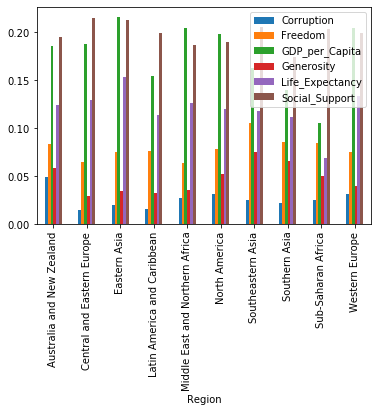

In [32]:
happiness_contribution_table.plot(kind='bar')